In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [54]:
df=pd.read_csv("/content/drive/MyDrive/datasets/h1n1.csv")

In [55]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [56]:
import seaborn as sns

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

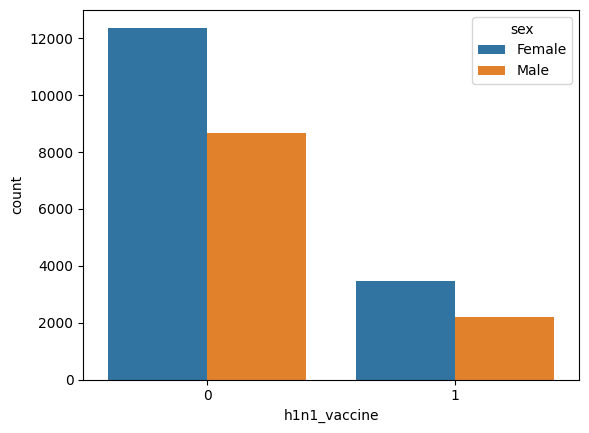

In [57]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

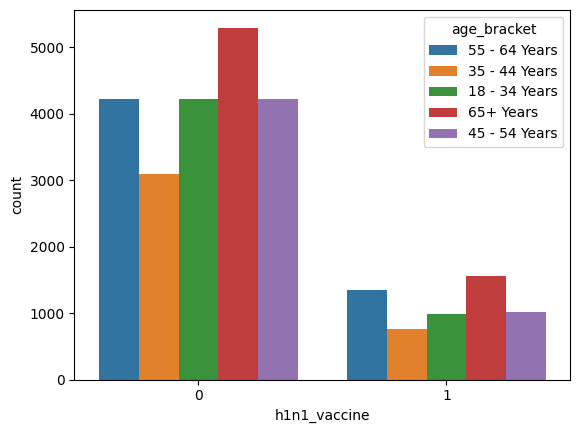

In [58]:
sns.countplot(x="h1n1_vaccine",hue="age_bracket",data=df)

In [59]:
df.shape

(26707, 34)

In [60]:
str_cols = df.select_dtypes(include = 'object').columns
df[str_cols].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [61]:
for col in df.columns:
    if df[col].isnull().sum() and df[col].dtypes != 'object':
        df[col].loc[(df[col].isnull())] = df[col].median()
for col in df.columns:
    if df[col].isnull().sum() and df[col].dtypes == 'object':
        df[col].loc[(df[col].isnull())] = df[col].mode().max()

In [62]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [63]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [64]:
LE = LabelEncoder()
for col in str_cols:
    df[col] = LE.fit_transform(df[col])

In [65]:
df[str_cols].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,3,1,3,0,2,1,0,1,2
1,1,0,3,1,2,1,1,0,0
2,0,2,3,1,0,1,0,0,0
3,4,0,3,0,2,1,1,1,1
4,2,3,3,0,0,0,0,0,0


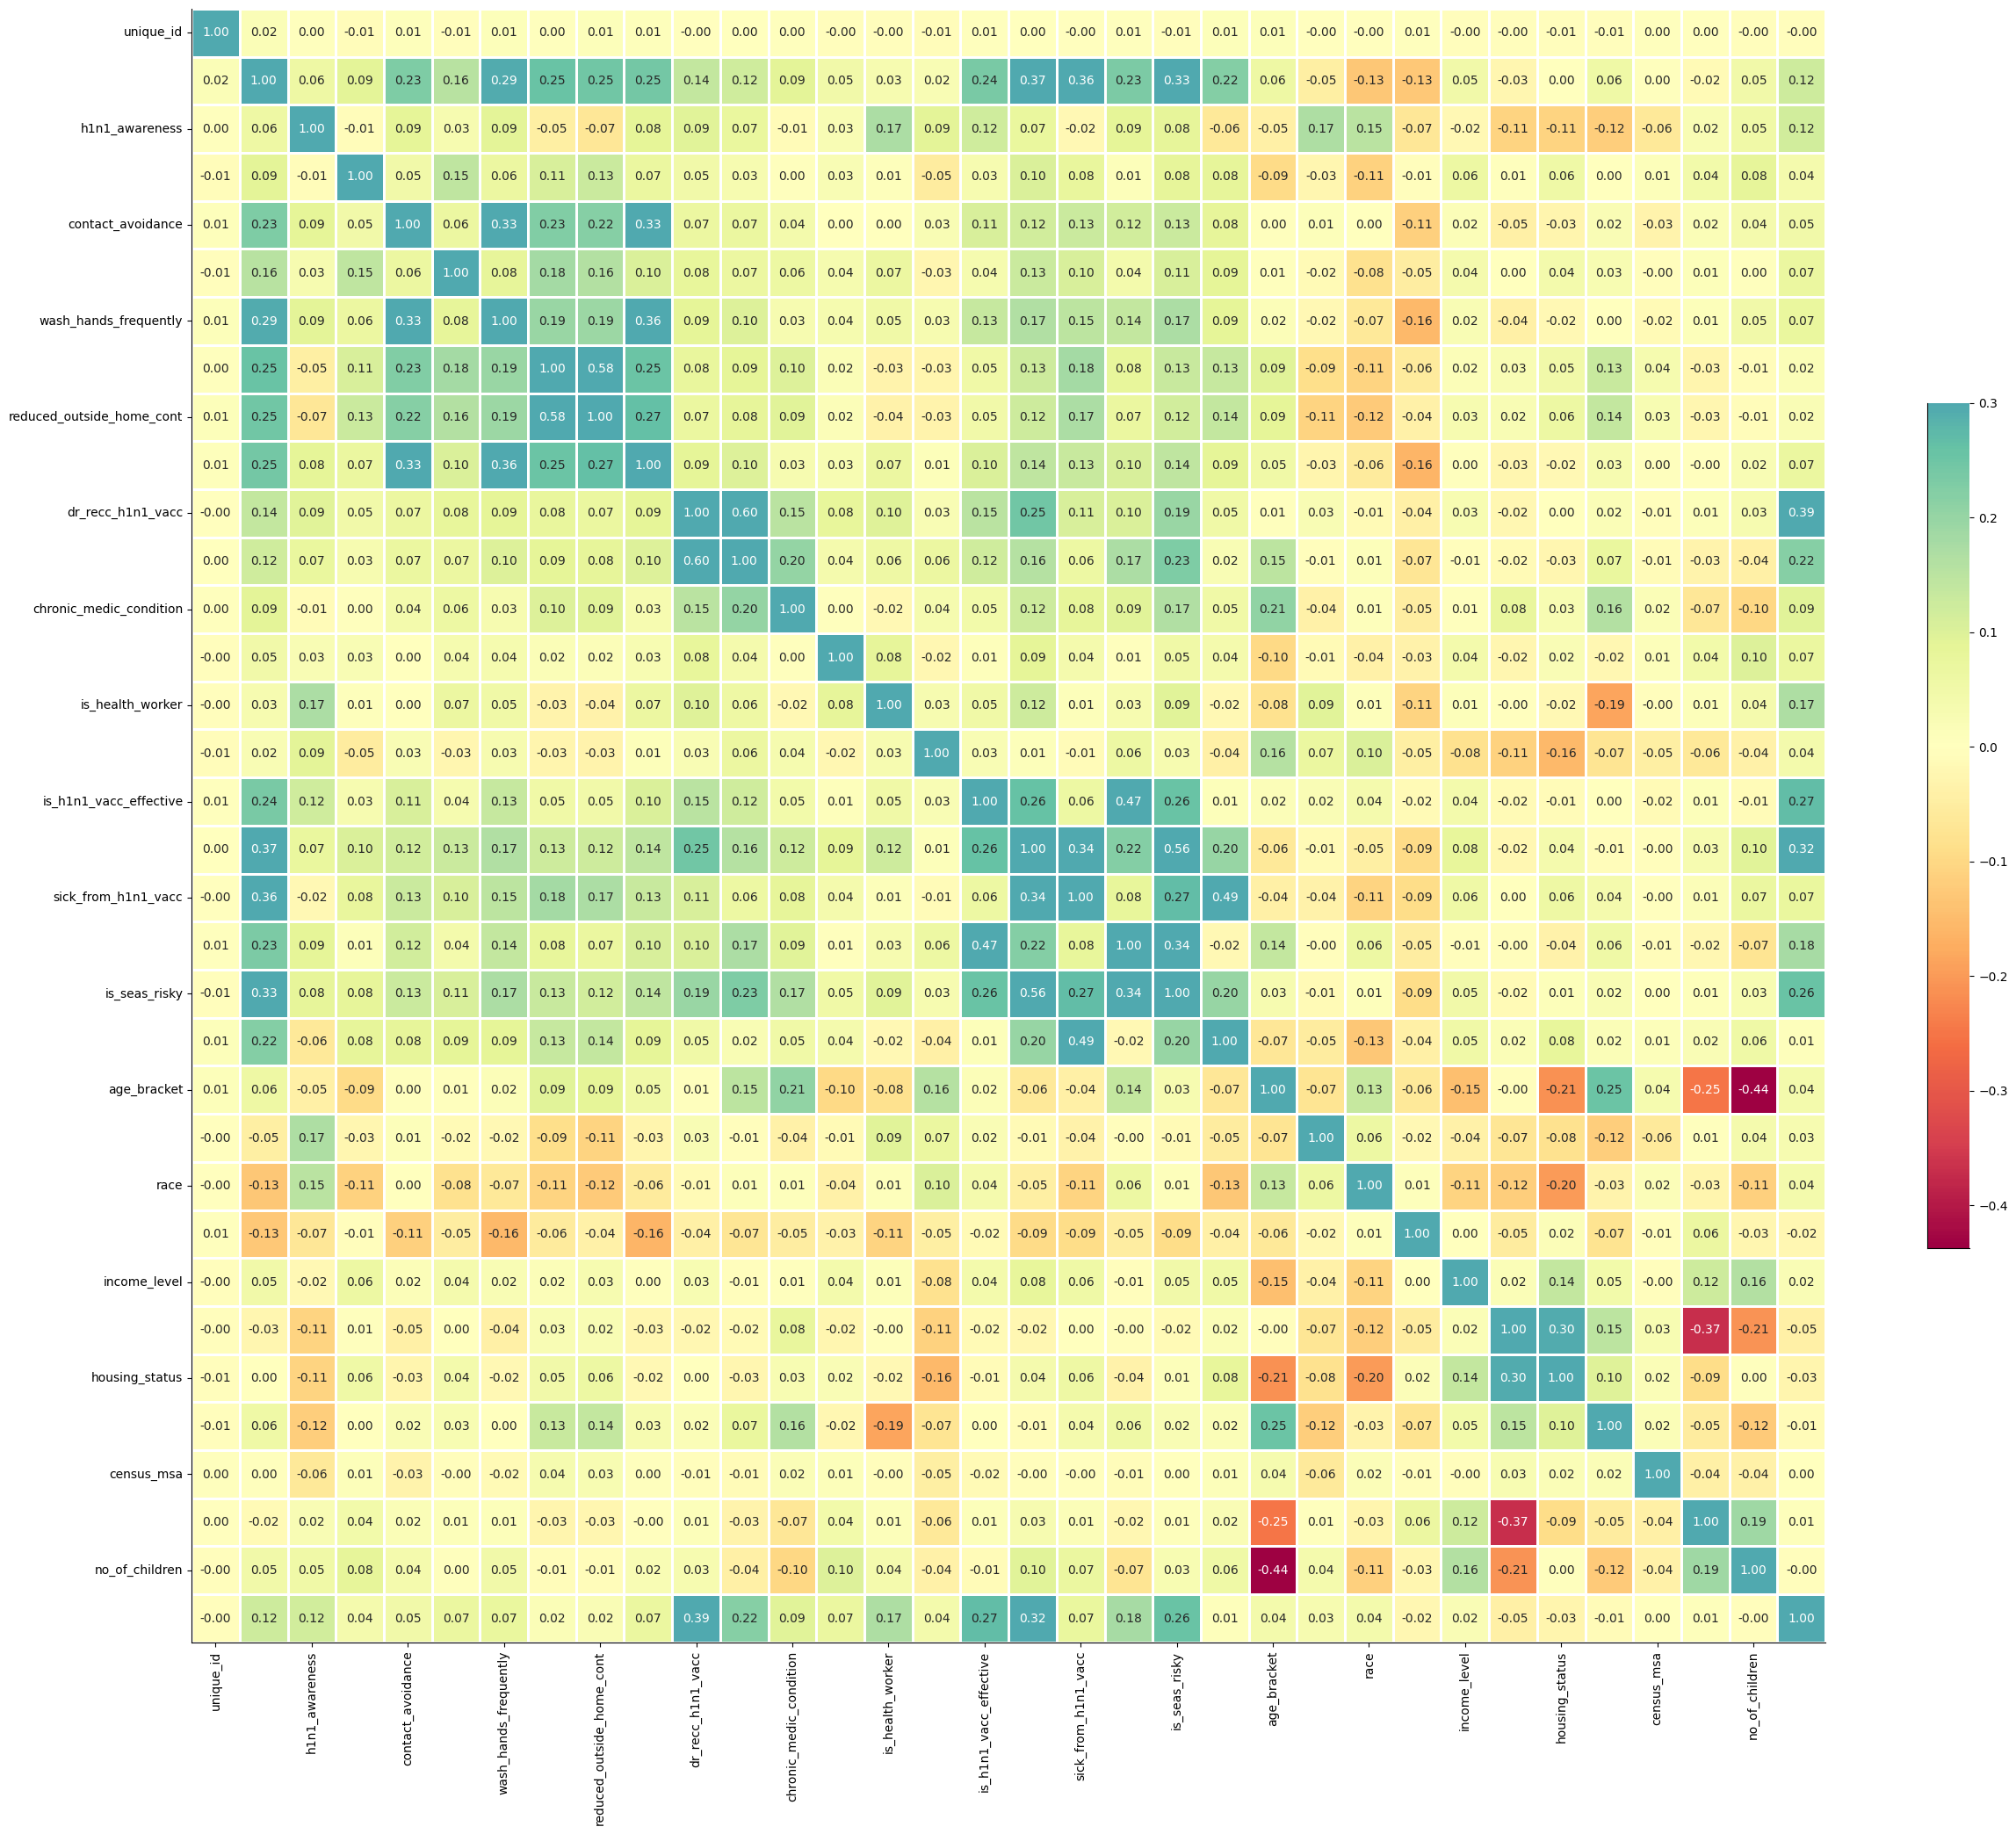

In [66]:
corr = df.corr()
g = sns.heatmap(corr,vmax=.3,center=0,square=True,linewidths=1,cbar_kws={"shrink":.5},annot=True,fmt='.2f',cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30,25)
plt.show()

In [67]:
X=df.drop(['h1n1_vaccine'],axis=1)
Y=df[['h1n1_vaccine']]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [69]:
X_train

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
6301,6301,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,3,1,1,0,0,0,1,1.0,1.0
13703,13703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,1.0,3.0
20607,20607,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,3,0,0,1,0,1,1,0.0,0.0
24272,24272,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,3,0,0,1,0,1,0,0.0,0.0
4838,4838,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,3,0,1,0,0,0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24598,24598,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2,3,1,2,0,1,1,0,1.0,0.0
14675,14675,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,3,1,1,0,0,0,0,1.0,0.0
19561,19561,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,3,0,0,0,0,1,0,1.0,0.0
4876,4876,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3,0,1,0,0,1,2,2.0,0.0


In [70]:
Y_train

,h1n1_vaccine
6301,0
13703,0
20607,1
24272,0
4838,1
...,...
24598,0
14675,0
19561,0
4876,0


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [72]:
model_1=LogisticRegression()

In [73]:
model_1.fit(X,Y)

LogisticRegression()

In [74]:
model_1.score(X_train,Y_train)

0.8193538033593667

In [75]:
model_1.score(X_test,Y_test)

0.8170472981405217

In [76]:
predictions=model_1.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.8170472981405217

In [78]:
from sklearn import metrics

In [79]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6306
           1       0.63      0.34      0.44      1707

    accuracy                           0.82      8013
   macro avg       0.74      0.64      0.67      8013
weighted avg       0.80      0.82      0.79      8013



In [80]:
from sklearn.metrics import confusion_matrix

<Axes: >

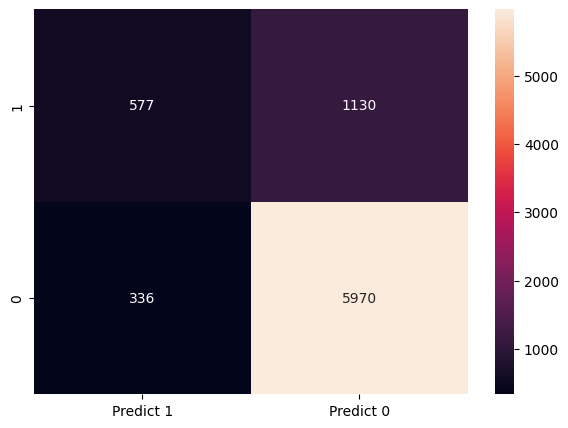

In [89]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,predictions, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model_2=DecisionTreeClassifier()

In [92]:
model_2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [94]:
model_2.score(X_train,Y_train)

1.0

In [95]:
model_2.score(X_test,Y_test)

0.7432921502558343

In [98]:
from sklearn.ensemble import BaggingClassifier

In [99]:
model_3=BaggingClassifier(n_estimators=99)

In [101]:
model_3.fit(X_train,Y_train)

BaggingClassifier(n_estimators=99)

In [102]:
from sklearn.ensemble import AdaBoostClassifier
model_4=AdaBoostClassifier(n_estimators=13)

In [103]:
model_4.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=13)

In [105]:
model_4.score(X_train,Y_train)


0.8324596127099604

In [106]:
model_4.score(X_test,Y_test)

0.831648571072008

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
model_5=GradientBoostingClassifier()

In [109]:
model_5.fit(X_train,Y_train)

GradientBoostingClassifier()

In [110]:
model_5.score(X_train,Y_train)

0.8458328875575051

In [111]:
model_5.score(X_test,Y_test)

0.8367652564582553

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model_6=RandomForestClassifier(n_estimators=50)

In [114]:
model_6.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

In [115]:
model_6.score(X_train,Y_train)

0.9995185621054884

In [116]:
model_6.score(X_test,Y_test)

0.8292774241856983